# libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.svm import SVC
import joblib

# Define data and summerixe it


In [2]:
df=pd.read_csv('data\Blood data.csv')


In [3]:
df.head()

,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,donate
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1,1
1,3,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0,1
2,5,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0,1
3,7,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1,1
4,10,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0,1


In [4]:
df.shape

(2000, 15)

In [5]:
df.head(20)


,Patient_Number,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,donate
0,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1,1
1,3,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0,1
2,5,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0,1
3,7,11.69,0.75,43,41,1,1.0,0,38369,32967,206.0,3,1,1,1
4,10,14.56,0.61,40,44,0,NaN,0,1278,12715,95.0,2,0,0,1
5,11,8.58,0.13,70,28,1,NaN,0,48527,26178,46.0,1,1,1,1
6,12,12.77,0.10,35,17,0,NaN,0,22500,43040,382.0,3,1,0,1
7,13,16.40,0.45,31,50,0,NaN,1,25639,46997,41.0,3,0,1,1
8,16,10.96,0.10,43,27,1,1.0,0,7329,39018,495.0,1,1,0,1
9,17,11.98,0.06,65,28,1,NaN,0,29834,45217,377.0,2,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   1908 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Pregnancy                      442 non-null    float64
 7   Smoking                        2000 non-null   int64  
 8   Physical_activity              2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    1758 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

In [7]:
df['donate'] = df['donate'].replace({0: 1, 1: 0})


In [8]:
df.donate.value_counts()

0    1121
1     879
Name: donate, dtype: int64

In [9]:
df.Sex.value_counts()

0    1008
1     992
Name: Sex, dtype: int64

In [10]:
df['alcohol_consumption_per_day']


0         NaN
1        67.0
2       397.0
3       206.0
4        95.0
        ...  
1995    471.0
1996     82.0
1997     48.0
1998    379.0
1999    253.0
Name: alcohol_consumption_per_day, Length: 2000, dtype: float64

In [11]:
df['Pregnancy'].value_counts()


0.0    243
1.0    199
Name: Pregnancy, dtype: int64

# Data Cleaning

In [12]:
df.isnull().sum()


Patient_Number                      0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
donate                              0
dtype: int64

In [13]:
df.isnull().mean()


Patient_Number                   0.000
Level_of_Hemoglobin              0.000
Genetic_Pedigree_Coefficient     0.046
Age                              0.000
BMI                              0.000
Sex                              0.000
Pregnancy                        0.779
Smoking                          0.000
Physical_activity                0.000
salt_content_in_the_diet         0.000
alcohol_consumption_per_day      0.121
Level_of_Stress                  0.000
Chronic_kidney_disease           0.000
Adrenal_and_thyroid_disorders    0.000
donate                           0.000
dtype: float64

In [14]:
df.alcohol_consumption_per_day.fillna(df.alcohol_consumption_per_day.mean(),inplace=True)
df.Genetic_Pedigree_Coefficient.fillna(df.Genetic_Pedigree_Coefficient.mean(),inplace=True)

In [15]:
df.loc[((df['Sex'] == 1) | (df['Sex'] == 0)) & (df['Pregnancy'].isnull()), 'Pregnancy'] = df['Sex'].map({0: -1, 1: 0})


In [16]:
df.isnull().sum()


Patient_Number                   0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
donate                           0
dtype: int64

In [17]:
df_filtered = df[df['Sex'] == 1][['Sex', 'Pregnancy']]

print(df_filtered.value_counts())


Sex  Pregnancy
1    0.0          793
     1.0          199
dtype: int64


In [18]:
df['Pregnancy'] = df['Pregnancy'].astype(int)


In [19]:
df.Pregnancy.value_counts()

-1    1008
 0     793
 1     199
Name: Pregnancy, dtype: int64

In [20]:
df.isnull().sum()


Patient_Number                   0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
donate                           0
dtype: int64

In [21]:

def null_value_check_in_dataframe(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

df_null = null_value_check_in_dataframe(df)
df_null

,column_name,percent_missing
Patient_Number,Patient_Number,0.0
Level_of_Hemoglobin,Level_of_Hemoglobin,0.0
Genetic_Pedigree_Coefficient,Genetic_Pedigree_Coefficient,0.0
Age,Age,0.0
BMI,BMI,0.0
Sex,Sex,0.0
Pregnancy,Pregnancy,0.0
Smoking,Smoking,0.0
Physical_activity,Physical_activity,0.0
salt_content_in_the_diet,salt_content_in_the_diet,0.0


In [22]:

df.drop(['Patient_Number'], axis=1, inplace=True)

# Data visulization

<Axes: xlabel='donate'>

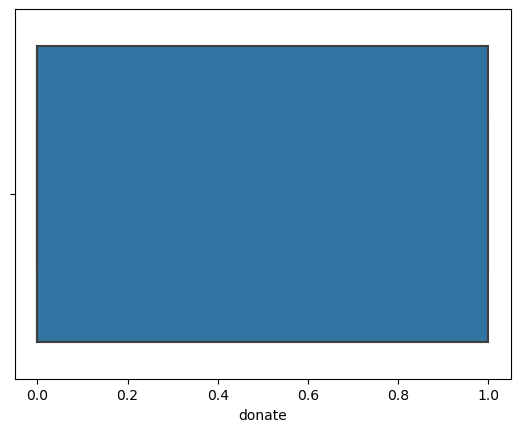

In [23]:
sns.boxplot(x='donate',data=df)


<Axes: xlabel='Level_of_Hemoglobin'>

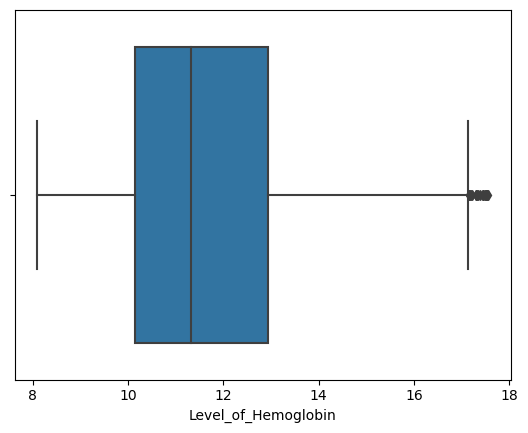

In [24]:
sns.boxplot(x='Level_of_Hemoglobin',data=df)


In [25]:
df['Level_of_Hemoglobin'].quantile([0,0.95])


0.00     8.10
0.95    16.01
Name: Level_of_Hemoglobin, dtype: float64

In [26]:
low,high=df['Level_of_Hemoglobin'].quantile([0,0.95])
sub=df['Level_of_Hemoglobin'].between(low,high)
print(sub)
df=df[sub]

0       True
1       True
2       True
3       True
4       True
        ... 
1995    True
1996    True
1997    True
1998    True
1999    True
Name: Level_of_Hemoglobin, Length: 2000, dtype: bool


<Axes: xlabel='Level_of_Hemoglobin'>

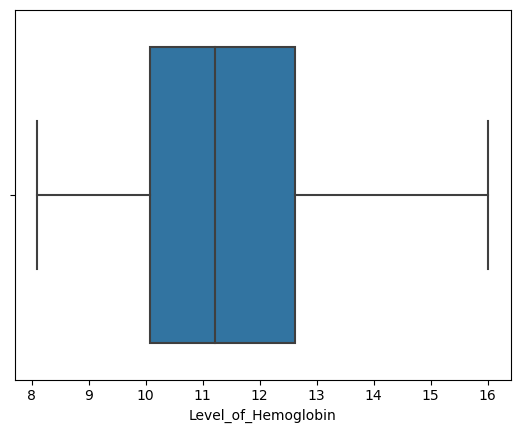

In [27]:
sns.boxplot(x='Level_of_Hemoglobin',data=df)


In [28]:
Q1 =df['Pregnancy'].quantile(0.25)
Q3 =df['Pregnancy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df['Pregnancy'][(df['Pregnancy'] < lower_bound) | (df ['Pregnancy']> upper_bound)].dropna()
print("Lower Boundaries: \n", lower_bound)
print("Upper Boundaries: \n", upper_bound)
print("Outliers: \n", outliers)



Lower Boundaries: 
 -2.5
Upper Boundaries: 
 1.5
Outliers: 
 Series([], Name: Pregnancy, dtype: int32)


In [29]:
min_Outliers = np.min(lower_bound)
print(min_Outliers)

-2.5


In [30]:
max_Outliers = np.max(upper_bound)
print(max_Outliers)


1.5


<Axes: xlabel='Pregnancy'>

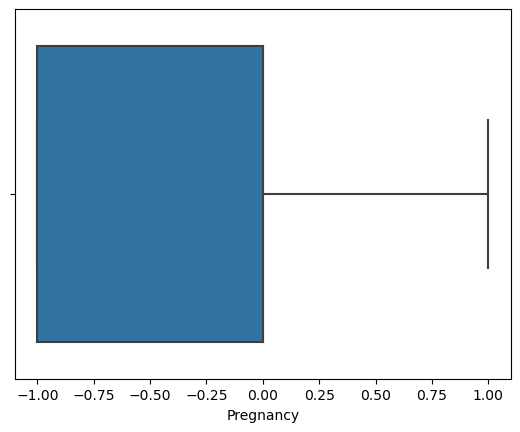

In [31]:
sns.boxplot(x='Pregnancy',data=df)


In [32]:
df.corr()


,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders,donate
Level_of_Hemoglobin,1.000000,-0.017735,-0.154009,0.102397,-0.367915,-0.390050,0.000517,-0.042264,0.020146,0.001647,0.024377,0.029181,-0.010757,-0.036708
Genetic_Pedigree_Coefficient,-0.017735,1.000000,-0.016608,-0.005219,0.019329,0.024328,-0.039220,-0.004337,0.045272,-0.015828,0.005947,0.047777,0.006748,0.026978
Age,-0.154009,-0.016608,1.000000,0.034769,0.040221,-0.116876,0.028557,0.025254,-0.042068,0.009467,0.010589,-0.045732,-0.012985,0.034290
BMI,0.102397,-0.005219,0.034769,1.000000,0.023211,0.016939,0.007025,-0.005447,0.025533,-0.045405,-0.006011,0.005254,0.037896,-0.012672
Sex,-0.367915,0.019329,0.040221,0.023211,1.000000,0.900985,0.008606,0.011007,-0.008806,0.005632,-0.007249,0.040677,0.002422,-0.099981
Pregnancy,-0.390050,0.024328,-0.116876,0.016939,0.900985,1.000000,-0.028899,-0.012388,0.002687,0.016074,-0.004050,0.038183,0.002665,-0.093663
Smoking,0.000517,-0.039220,0.028557,0.007025,0.008606,-0.028899,1.000000,-0.015216,-0.000138,0.000898,-0.020699,-0.018379,0.017631,0.003332
Physical_activity,-0.042264,-0.004337,0.025254,-0.005447,0.011007,-0.012388,-0.015216,1.000000,-0.031581,-0.007558,-0.035995,0.010048,-0.002452,-0.026242
salt_content_in_the_diet,0.020146,0.045272,-0.042068,0.025533,-0.008806,0.002687,-0.000138,-0.031581,1.000000,-0.030961,-0.018275,0.004374,0.018480,-0.001337
alcohol_consumption_per_day,0.001647,-0.015828,0.009467,-0.045405,0.005632,0.016074,0.000898,-0.007558,-0.030961,1.000000,0.023004,0.031332,-0.003301,-0.015736


<Axes: >

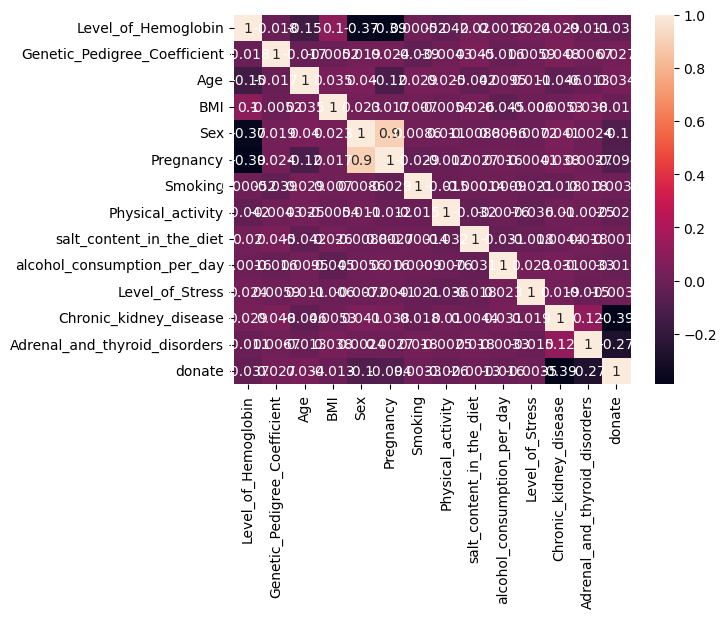

In [33]:
sns.heatmap(df.corr(),annot=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_43544\3256901608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['donate'])


<Axes: xlabel='donate', ylabel='Density'>

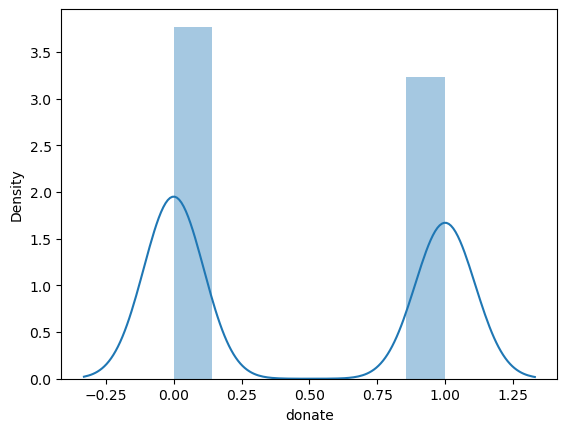

In [34]:
sns.distplot(df['donate'])


<Axes: xlabel='Smoking', ylabel='count'>

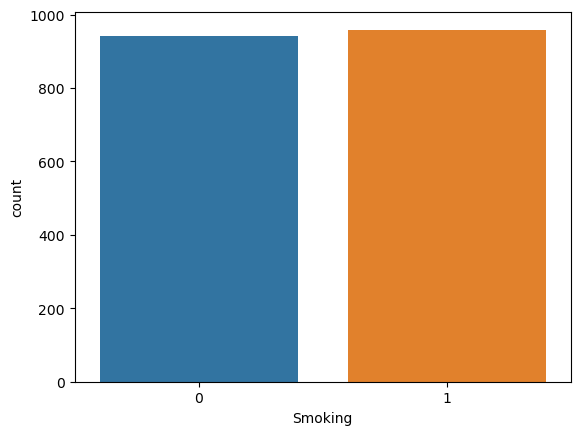

In [35]:
sns.countplot(x='Smoking',data=df)


# Split data

In [36]:
x=df.drop(['donate'],axis=1)

In [37]:
y=df.donate

In [38]:
from sklearn.preprocessing import StandardScaler

x_standardized = x.copy()
for col in x_standardized.columns:
    x_standardized[col] = StandardScaler().fit_transform(x_standardized[col].values.reshape(-1, 1))
    
x_standardized.head()

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,-0.087968,1.412922,-0.762973,-0.583485,0.962309,2.065171,-1.008983,1.480733,1.630872,0.002475,-0.021784,1.003689,1.140812
1,-0.345336,1.447878,1.351587,1.608952,-1.039167,-0.936274,-1.008983,-1.084584,0.321674,-1.360214,-0.021784,1.003689,-0.876568
2,1.429981,1.168230,0.294307,-0.920782,-1.039167,-0.936274,-1.008983,-0.683446,1.741555,1.083626,-0.021784,-0.996324,-0.876568
3,0.127381,0.888583,-0.234333,0.934356,0.962309,2.065171,-1.008983,0.939225,0.568090,-0.330839,1.196223,1.003689,1.140812
4,1.634825,0.399200,-0.410547,1.187329,-1.039167,-0.936274,-1.008983,-1.706335,-0.856928,-1.152858,-0.021784,-0.996324,-0.876568


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=30)

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train , columns=x.columns)
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test , columns= x.columns)

# Model

In [41]:

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

rf_probs = clf.predict_proba(x_test)

rf_probs = rf_probs[:, 1]

y_pred=clf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
print("Accuracy  :: %.3f"% accuracy_score(y_test, y_pred))
print("Recall    :: %.3f"% recall_score(y_test, y_pred))
print("Precision :: %.3f"% precision_score(y_test, y_pred))
print("F1 Score  :: %.3f"% f1_score(y_test, y_pred))
print("AUC Score :: %.3f"% roc_auc_score(y_test, rf_probs))

print("\nClassification Report ::")
print("\n",classification_report(y_test, y_pred))

Accuracy  :: 0.825
Recall    :: 0.813
Precision :: 0.819
F1 Score  :: 0.816
AUC Score :: 0.876

Classification Report ::

               precision    recall  f1-score   support

           0       0.83      0.84      0.83       298
           1       0.82      0.81      0.82       273

    accuracy                           0.82       571
   macro avg       0.82      0.82      0.82       571
weighted avg       0.82      0.82      0.82       571



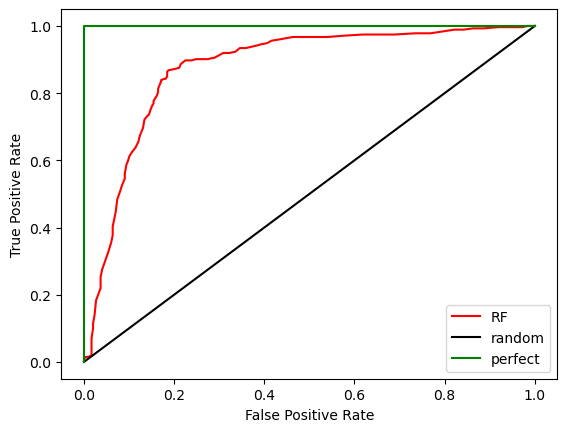

In [43]:

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, rf_probs)

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

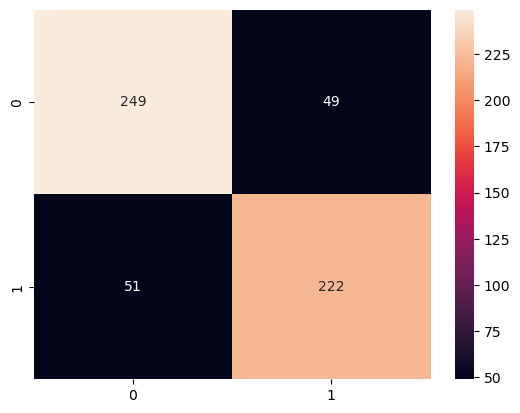

In [44]:

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.show()

In [45]:

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    # variable to hold all of the datasets that will be created from the application of k-fold cross validation on the training set
    dfs = []
    
    # list of tuples holding the name and class for each classifier to be tested
    models = [('LogReg', LogisticRegression()), 
              ('RF', RandomForestClassifier()),
              ('KNN', KNeighborsClassifier()),
              ('SVM', SVC()), 
              ('GNB', GaussianNB())
             ]

    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']

    for name, model in models:

      kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
      cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

      clf = model.fit(X_train, y_train)
      y_pred = clf.predict(X_test)

      print(name)
      print(classification_report(y_test, y_pred))

      results.append(cv_results)
      names.append(name)

      this_df = pd.DataFrame(cv_results)
      this_df['model'] = name
      dfs.append(this_df)
      final = pd.concat(dfs, ignore_index=True)

    return final

In [46]:
final = run_exps(x_train, y_train, x_test, y_test)

LogReg
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       298
           1       0.71      0.63      0.67       273

    accuracy                           0.70       571
   macro avg       0.70      0.70      0.70       571
weighted avg       0.70      0.70      0.70       571

RF
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       298
           1       0.81      0.81      0.81       273

    accuracy                           0.82       571
   macro avg       0.82      0.82      0.82       571
weighted avg       0.82      0.82      0.82       571

KNN
              precision    recall  f1-score   support

           0       0.76      0.66      0.71       298
           1       0.68      0.78      0.72       273

    accuracy                           0.71       571
   macro avg       0.72      0.72      0.71       571
weighted avg       0.72      0.71      0.71       571

SVM
 

In [47]:
# pickle.dump(clf,open('model1.pkl','wb'))
# pickle.dump(scaler,open('scaler1.pkl','wb'))
# Save model and scaler
joblib.dump(clf, 'model1.joblib')
joblib.dump(scaler, 'scaler1.joblib')

['scaler1.joblib']

In [48]:
clf.predict([[.4,.9,.2,.3,1,1,0,.9,.9,.5,2,1,1]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)